## Import

In [1]:
import numpy as np
# import pygame

import scipy.integrate as integ
import scipy.interpolate as i2
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from astropy import units as u
from astropy import constants as c
# import cmath as cm
from shooting import *
import shootingres as shr
import shooting as sho

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import ray

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')

f = 16

In [3]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

In [2]:
r1 = .1
r2 = 5
reso = 500
r = np.arange(1, 5, 24/reso)
q = 2
zeros_arr = np.zeros(len(r))
zero_func = i2.CubicSpline(r, zeros_arr)

kn = 1
m = 1
kz = kn*np.pi/(4)


# Combined

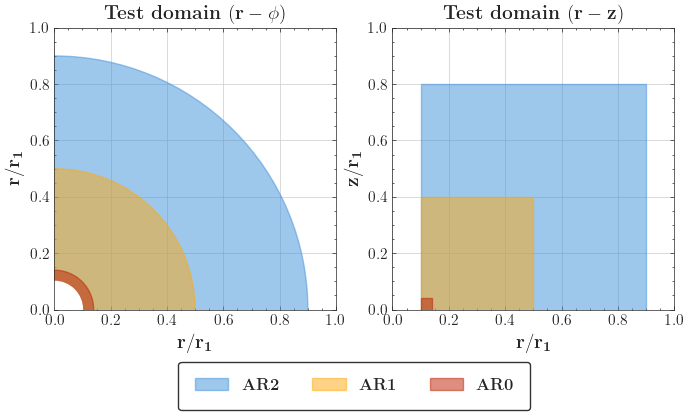

In [25]:
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#92DADD']


fig, axs = plt.subplots(1,2)
# axs[0].set_xlim([0, .3])
# axs[1].set_xlim([0, .3])
fig.set_figheight(4)
fig.set_figwidth(8)
axs[0].set_title(r'\textbf{Test domain} $\mathbf{(r-\phi)}$', fontsize = 14)
axs[1].set_title(r'\textbf{Test domain} $\mathbf{(r-z)}$', fontsize = 14)

axs[0].set(xlabel='x-label', ylabel=r"r")
axs[1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
axs[0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
axs[1].set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 14)
axs[0].set_ylabel(r'$\mathbf{r/r_1}$', fontsize = 14)
# Hide x labels and tick labels for top plots and y ticks for right plots.


# color_arr = ['dodgerblue', 'mediumorchid', 'midnightblue', 'springgreen', 'tomato', 'k']
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

# ###
rectangle = plt.Rectangle((x3, y3), width3, height3, color=color_arr[0], alpha=0.5, label = r'\textbf{AR2}')
axs[1].add_patch(rectangle)
rectangle = plt.Rectangle((x, y), width, height, color=color_arr[1], alpha=0.5, label = r'\textbf{AR1}')
axs[1].add_patch(rectangle)
# rectangle = plt.Rectangle((x2, y2), width2, height2, color=color_arr[2], alpha=0.5, label = r'\textbf{AR1}')
# axs[1].add_patch(rectangle)
rectangle = plt.Rectangle((x4, y4), width4, height4, color=color_arr[2],  alpha=0.5,label = r'\textbf{AR0}')
axs[1].add_patch(rectangle)
centers = [(0, 0), (0, 0), (0, 0)]
radii = [0.9,0.5,0.14]

for j in range(0, len(centers)):
    circle = plt.Circle(centers[j], radii[j], color = color_arr[j], alpha=0.5)
    axs[0].add_artist(circle)
centers = [(0, 0)]
radii = [0.1]

# Plot each disk
for center, radius in zip(centers, radii):
    circle = plt.Circle(center, radius, color='#FFFFFF', alpha=1)
    axs[0].add_artist(circle)
axs[0].set_aspect('equal', 'box')




axs[1].set_aspect('equal', 'box')


# axs[0].plot(VA_l_MCI2_Bz,gr_2k1_MCI_l_Bz, label=r'$k_z = 2k_1$ (Kep.)', color = color_arr[0])
# axs[0].plot(VA_h_MCI2_Bz,gr_2k1_MCI_h_Bz, color = color_arr[0])


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=3)

# fig.legend(lines, labels, loc='lower center', ncol=4, 
#            bbox_to_anchor=(0.5, -0.12),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1, fontsize = 12)

fig.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)
plt.savefig('Paper-Plots-Misc/AR-comb-v2.png', bbox_inches='tight', dpi=400)
plt.savefig('Paper-Plots-Misc/AR-comb-v2.svg', bbox_inches='tight', format = 'svg')
plt.savefig('Paper-Plots-Misc/AR-comb-v2.pdf', bbox_inches='tight', dpi=400)

plt.show()
plt.close()
#######plt.show()

# Dimensionless Qts

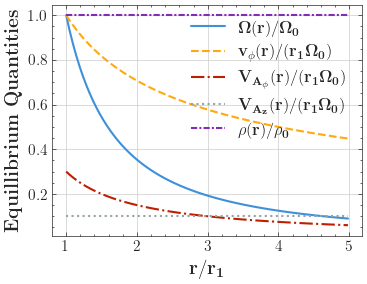

In [54]:
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
r_arr = np.linspace(1,5,100)
plt.figure(figsize = (4,3))
plt.plot(r, 1/r**(3/2), color = color_arr[0], label = r'$\mathbf{\Omega(r)/\Omega_0}$', linewidth = 1.5)
plt.plot(r, r/r**(3/2), color = color_arr[1], linestyle = '--', label = r'$\mathbf{v_\phi(r)/(r_1\Omega_0)}$', linewidth = 1.5)
plt.plot(r, 0.3/r**(1), color = color_arr[2], linestyle = '-.', label = r'$\mathbf{V_{A_\phi}(r)/(r_1\Omega_0)}$', linewidth = 1.5)
plt.plot(r, 0.1*np.ones(len(r)), color = color_arr[3], linestyle = ':', label = r'$\mathbf{V_{A_z}(r)/(r_1\Omega_0)}$', linewidth = 1.5)
plt.plot(r, 1*np.ones(len(r)), color = color_arr[4], linestyle =  (0, (3, 1, 1, 1)), label = r'$\mathbf{\rho(r)/\rho_0}$', linewidth = 1.5)

plt.xlabel(r'$\mathbf{r/r_1}$', fontsize = 14)
plt.ylabel(r'\textbf{Equillibrium Quantities}', fontsize = 14)
plt.legend(fontsize = 12, loc = 'upper right')
plt.savefig('Stab/Fig1.pdf')
plt.show()